## Feature Reduction

c:\Users\fenst\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


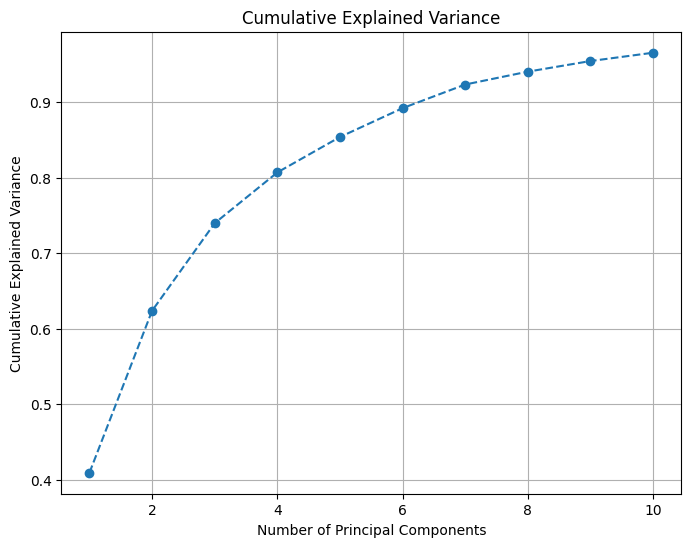

In [1]:
import matplotlib.pylab as plt
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def r2_score(y_true, y_pred):
    # Calculate the mean of the true target values
    y_mean = np.mean(y_true)
    
    # Calculate the total sum of squares (TSS)
    tss = np.sum((y_true - y_mean) ** 2)
    
    # Calculate the residual sum of squares (RSS)
    rss = np.sum((y_true - y_pred) ** 2)
    
    # Calculate R^2 score
    r2 = 1 - (rss / tss)
    
    return r2


#Load the CSV file
data = pd.read_csv('Data_EV.csv')


def Create_data(one_hot):

    #Prepare the data
    X = data.drop(columns=['Number of Evs 2022'])
    y = data['Number of Evs 2022']  # Dependent variable
    X = X.drop(columns=['State'])

    if one_hot == False:
        return X, y
    else:
        encoder = OneHotEncoder(sparse=False)

        one_hot_encoded = encoder.fit_transform(data[['Political Affiliation']])
        feature_names = encoder.categories_[0]
        one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=feature_names)
        X = pd.concat([X, one_hot_encoded_df], axis=1)
        X = X.drop(columns=['Political Affiliation'])

        return X, y


X,y = Create_data(True)
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Perform PCA
pca = PCA(n_components=10)  # Specify the number of principal components
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()



In [2]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
threshold = 0.95
# Calculate the correlation matrix
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

# Display the correlation matrix with gradient background
correlation_matrix_style = correlation_matrix.style.background_gradient(cmap='coolwarm')


# Print the styled correlation matrix
print("Correlation Matrix:")
correlation_matrix_style

variables_above_threshold = {}
for column in correlation_matrix.columns:
    variables_above_threshold[column] = (correlation_matrix[column].abs() > threshold).sum()

df_variables_above_threshold = pd.DataFrame(variables_above_threshold.items(), columns=['Variable', 'Count'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Print the count of variables above the threshold for each variable
print("Number of variables with correlation above", threshold)
print(df_variables_above_threshold)

Correlation Matrix:
Number of variables with correlation above 0.95
                                             Variable  Count
0         Population estimates, July 1, 2023, (V2023)     14
1         Population Estimates, July 1, 2022, (V2022)     14
2   Population, percent change - April 1, 2020 (es...      1
3                             Female persons, percent      1
4                                 Veterans, 2018-2022     13
5            Foreign born persons, percent, 2018-2022      1
6                Housing units, July 1, 2022, (V2022)     14
7         Owner-occupied housing unit rate, 2018-2022      1
8   Median value of owner-occupied housing units, ...      1
9                    Persons per household, 2018-2022      1
10  Living in same house 1 year ago, percent of pe...      1
11     Households with a computer, percent, 2018-2022      1
12  Households with a broadband Internet subscript...      1
13  High school graduate or higher, percent of per...      1
14  Bachelor's de

In [3]:
X,y = Create_data(False)

X = X.drop(columns=['Political Affiliation'])
X = X.drop(columns=['Population Estimates, July 1, 2022, (V2022)'])
X = X.drop(columns=['Veterans, 2018-2022'])
X = X.drop(columns=['Housing units, July 1, 2022, (V2022)'])
X = X.drop(columns=['Total retail sales, 2017 ($1,000)'])
X = X.drop(columns=['Total employer establishments, 2021'])
X = X.drop(columns=['Total employment, 2021'])
X = X.drop(columns=['Total annual payroll, 2021 ($1,000)'])
X = X.drop(columns=['All employer firms, Reference year 2017'])
X = X.drop(columns=['Land area in square miles, 2010'])
X = X.drop(columns=['Population per square mile, 2010'])
X = X.drop(columns=['Number of EVs 2018'])
X = X.drop(columns=['Number of EVs 2019'])
X = X.drop(columns=['Number of EVs 2020'])
X = X.drop(columns=['Number of EVs 2021'])
X = X.drop(columns=['Total Chargers Chargers'])
X = X.drop(columns=['Land area in square miles, 2020'])
X = X.drop(columns=['Auto sales 2023'])




In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the correlation matrix
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

# Display the correlation matrix with gradient background
correlation_matrix_style = correlation_matrix.style.background_gradient(cmap='coolwarm')


# Print the styled correlation matrix
print("Correlation Matrix:")
correlation_matrix_style

variables_above_threshold = {}
for column in correlation_matrix.columns:
    variables_above_threshold[column] = (correlation_matrix[column].abs() > threshold).sum()

df_variables_above_threshold = pd.DataFrame(variables_above_threshold.items(), columns=['Variable', 'Count'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Print the count of variables above the threshold for each variable
print("Number of variables with correlation above", threshold)
print(df_variables_above_threshold)

Correlation Matrix:
Number of variables with correlation above 0.95
                                             Variable  Count
0         Population estimates, July 1, 2023, (V2023)      1
1   Population, percent change - April 1, 2020 (es...      1
2                             Female persons, percent      1
3            Foreign born persons, percent, 2018-2022      1
4         Owner-occupied housing unit rate, 2018-2022      1
5   Median value of owner-occupied housing units, ...      1
6                    Persons per household, 2018-2022      1
7   Living in same house 1 year ago, percent of pe...      1
8      Households with a computer, percent, 2018-2022      1
9   Households with a broadband Internet subscript...      1
10  High school graduate or higher, percent of per...      1
11  Bachelor's degree or higher, percent of person...      1
12  In civilian labor force, total, percent of pop...      1
13  Mean travel time to work (minutes), workers ag...      1
14  Median househ

In [5]:
print("Correlation Matrix:")
correlation_matrix_style

Correlation Matrix:


,"Population estimates, July 1, 2023, (V2023)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)","Female persons, percent","Foreign born persons, percent, 2018-2022","Owner-occupied housing unit rate, 2018-2022","Median value of owner-occupied housing units, 2018-2022","Persons per household, 2018-2022","Living in same house 1 year ago, percent of persons age 1 year+, 2018-2022","Households with a computer, percent, 2018-2022","Households with a broadband Internet subscription, percent, 2018-2022","High school graduate or higher, percent of persons age 25 years+, 2018-2022","Bachelor's degree or higher, percent of persons age 25 years+, 2018-2022","In civilian labor force, total, percent of population age 16 years+, 2018-2022","Mean travel time to work (minutes), workers age 16 years+, 2018-2022","Median household income (in 2022 dollars), 2018-2022","Per capita income in past 12 months (in 2022 dollars), 2018-2022","Persons in poverty, percent","Total employment, percent change, 2020-2021","Population per square mile, 2020",Charging Stations
"Population estimates, July 1, 2023, (V2023)",1.000000,-0.027242,0.063533,0.193998,-0.158491,0.028525,0.103891,0.057857,0.066906,0.065089,-0.167744,0.050035,-0.003187,0.163023,0.036627,0.057269,-0.033271,-0.017064,-0.030844,-0.013397
"Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)",-0.027242,1.000000,-0.080392,-0.167378,0.284896,-0.126854,0.089505,-0.495540,0.279235,0.115675,0.086263,-0.127418,0.021608,-0.275966,-0.185289,-0.260210,-0.175765,0.621691,-0.221944,0.001838
"Female persons, percent",0.063533,-0.080392,1.000000,0.137811,0.001822,-0.181388,-0.123811,0.644463,-0.393455,-0.257518,-0.463136,0.066614,-0.363430,0.643057,-0.170894,-0.020157,0.290524,-0.046270,0.472539,0.149451
"Foreign born persons, percent, 2018-2022",0.193998,-0.167378,0.137811,1.000000,-0.741846,0.686515,0.513413,0.217809,0.528528,0.575654,-0.341442,0.518788,0.189947,0.667578,0.649158,0.618244,-0.299048,-0.474759,0.567123,0.153050
"Owner-occupied housing unit rate, 2018-2022",-0.158491,0.284896,0.001822,-0.741846,1.000000,-0.528902,-0.387250,0.007020,-0.292904,-0.286766,0.448722,-0.226285,-0.111741,-0.385845,-0.353385,-0.348547,-0.011520,0.456748,-0.290432,-0.233165
"Median value of owner-occupied housing units, 2018-2022",0.028525,-0.126854,-0.181388,0.686515,-0.528902,1.000000,0.568905,-0.010271,0.649997,0.700142,0.088820,0.577762,0.271182,0.383424,0.784088,0.637111,-0.522484,-0.479286,0.304020,-0.023139
"Persons per household, 2018-2022",0.103891,0.089505,-0.123811,0.513413,-0.387250,0.568905,1.000000,-0.062521,0.454737,0.326362,-0.349307,0.049854,-0.002003,0.279763,0.357023,0.043632,-0.085342,-0.108523,0.043594,0.077300
"Living in same house 1 year ago, percent of persons age 1 year+, 2018-2022",0.057857,-0.495540,0.644463,0.217809,0.007020,-0.010271,-0.062521,1.000000,-0.420079,-0.158718,-0.249185,0.153366,-0.210268,0.583777,0.094939,0.194747,0.124330,-0.351541,0.568401,0.035114
"Households with a computer, percent, 2018-2022",0.066906,0.279235,-0.393455,0.528528,-0.292904,0.649997,0.454737,-0.420079,1.000000,0.902775,0.305906,0.584475,0.604470,0.093906,0.735667,0.593750,-0.757941,-0.023901,0.105909,-0.055724
"Households with a broadband Internet subscription, percent, 2018-2022",0.065089,0.115675,-0.257518,0.575654,-0.286766,0.700142,0.326362,-0.158718,0.902775,1.000000,0.371972,0.727187,0.664306,0.246010,0.858778,0.772819,-0.856388,-0.111966,0.344422,-0.122556


In [6]:
X,y = Create_data(True)
X = X.drop(columns=['Population Estimates, July 1, 2022, (V2022)'])
X = X.drop(columns=['Veterans, 2018-2022'])
X = X.drop(columns=['Housing units, July 1, 2022, (V2022)'])
X = X.drop(columns=['Total retail sales, 2017 ($1,000)'])
X = X.drop(columns=['Total employer establishments, 2021'])
X = X.drop(columns=['Total employment, 2021'])
X = X.drop(columns=['Total annual payroll, 2021 ($1,000)'])
X = X.drop(columns=['All employer firms, Reference year 2017'])
X = X.drop(columns=['Land area in square miles, 2010'])
X = X.drop(columns=['Population per square mile, 2010'])
X = X.drop(columns=['Number of EVs 2018'])
X = X.drop(columns=['Number of EVs 2019'])
X = X.drop(columns=['Number of EVs 2020'])
X = X.drop(columns=['Number of EVs 2021'])
X = X.drop(columns=['Total Chargers Chargers'])
X = X.drop(columns=['Land area in square miles, 2020'])
X = X.drop(columns=['Auto sales 2023'])

#Scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))




c:\Users\fenst\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
def run_linear_regression(X, y):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Create and fit linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Evaluate model on train set
    train_r2 = r2_score(y_train, model.predict(X_train))
    # Evaluate model on test set
    test_r2 = r2_score(y_test, model.predict(X_test))
    return model, train_r2, test_r2

def remove_feature_with_smallest_contribution(X, y, model):
    # Get coefficients
    coefficients = model.coef_
    # Find index of feature with smallest coefficient magnitude
    feature_to_remove_index = np.argmin(np.abs(coefficients))
    # Remove feature with smallest coefficient magnitude
    X_updated = np.delete(X, feature_to_remove_index, axis=1)
    return X_updated

model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)


Initial coefficients: [[ 0.91511339 -0.12433834 -0.08857012  0.07636195  0.02116024  0.28895392
  -0.15472594  0.20164559  0.26785594 -0.31057536 -0.30450289 -0.01318846
  -0.00554897 -0.08023495 -0.00558651  0.04830453 -0.1280947   0.19868478
  -0.09195968 -0.02548352 -0.00913193  0.00913193]]
Initial train R2: 0.9929438164436438
Initial test R2: -4.872950855119564


In [8]:

X = X.drop(columns=['Blue'])
X = X.drop(columns=['Red'])


#Scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)

Initial coefficients: [[ 0.91279053 -0.12539259 -0.0863612   0.07969208  0.0161827   0.28244327
  -0.14511929  0.19653287  0.27048493 -0.32739272 -0.29599816 -0.01507596
  -0.01099918 -0.0851704  -0.00295214  0.0557398  -0.12342333  0.20897994
  -0.08898517 -0.02888722]]
Initial train R2: 0.9928931063605603
Initial test R2: -5.12696893223867


In [9]:
X = X.drop(columns=['Median household income (in 2022 dollars), 2018-2022'])
#Scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)

Initial coefficients: [[ 0.91281727 -0.12512001 -0.08612687  0.07996502  0.01603335  0.28201353
  -0.14591408  0.19657282  0.27033988 -0.32723793 -0.29609461 -0.01481872
  -0.01131515 -0.08543382  0.05385502 -0.1228389   0.20898037 -0.08936289
  -0.02892056]]
Initial train R2: 0.9928930480441714
Initial test R2: -5.132622582517714


In [10]:
X = X.drop(columns=['Owner-occupied housing unit rate, 2018-2022'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)	

Initial coefficients: [[ 0.91191782 -0.1240858  -0.08759233  0.07532111  0.27487119 -0.14432501
   0.20333262  0.27352963 -0.32768152 -0.28527326 -0.01395534 -0.01471739
  -0.07986278  0.05210453 -0.12258536  0.21099448 -0.09116508 -0.02997763]]
Initial train R2: 0.9928632063846824
Initial test R2: -5.326598529911019


In [11]:
X = X.drop(columns=['High school graduate or higher, percent of persons age 25 years+, 2018-2022'])
X = X.drop(columns=["Bachelor's degree or higher, percent of persons age 25 years+, 2018-2022"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)	

Initial coefficients: [[ 0.92362479 -0.08587697 -0.07902461  0.24085559  0.22940711 -0.10459604
   0.23080173  0.23601843 -0.25684215  0.06347891 -0.00947925 -0.00332975
   0.16065749  0.1987768  -0.10550598 -0.03147951]]
Initial train R2: 0.9854468188736691
Initial test R2: -8.630479945932214


In [12]:
X = X.drop(columns=['Per capita income in past 12 months (in 2022 dollars), 2018-2022'])
X = X.drop(columns=["Mean travel time to work (minutes), workers age 16 years+, 2018-2022"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)	

Initial coefficients: [[ 0.92318939 -0.08380025 -0.0846084   0.23858333  0.22824994 -0.10423282
   0.23037495  0.23669838 -0.2625509   0.0659461   0.16225705  0.19944541
  -0.10523369 -0.03188549]]
Initial train R2: 0.9854292156235962
Initial test R2: -8.860311473288021


In [13]:
X = X.drop(columns=['Charging Stations'])
X = X.drop(columns=["Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)"])
X = X.drop(columns=["In civilian labor force, total, percent of population age 16 years+, 2018-2022"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)	

Initial coefficients: [[ 0.92895436 -0.11851674  0.21323751  0.18847209 -0.09415313  0.22630488
   0.14966011 -0.11827358  0.14553217  0.1475329  -0.09982265]]
Initial train R2: 0.9809823605587865
Initial test R2: -5.388480565495084


In [14]:
X = X.drop(columns=['Population per square mile, 2020'])
X = X.drop(columns=["Persons per household, 2018-2022"])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)	

Initial coefficients: [[ 0.94010871 -0.13082698  0.14992212  0.14530917  0.17327396  0.10246714
  -0.10470439  0.11914042  0.12837569]]
Initial train R2: 0.9763298626202482
Initial test R2: -4.604714519140413


In [15]:
X = X.drop(columns=['Households with a computer, percent, 2018-2022'])
X = X.drop(columns=["Households with a broadband Internet subscription, percent, 2018-2022"])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)	

Initial coefficients: [[ 0.94123873 -0.13332279  0.16053244  0.13795111  0.14165497  0.1275511
   0.12761603]]
Initial train R2: 0.9755479915385069
Initial test R2: -4.34548238675459


In [17]:
X = X.drop(columns=['Female persons, percent'])
X = X.drop(columns=["Total employment, percent change, 2020-2021"])
X = X.drop(columns=["Persons in poverty, percent"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)	

Initial coefficients: [[0.94797569 0.09854633 0.08138875 0.02759105]]
Initial train R2: 0.9599065234248596
Initial test R2: -1.8938493207011953


In [18]:
X = X.drop(columns=['Living in same house 1 year ago, percent of persons age 1 year+, 2018-2022'])
X = X.drop(columns=["Median value of owner-occupied housing units, 2018-2022"])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)	

Initial coefficients: [[0.93838558 0.17233656]]
Initial train R2: 0.9570634766985698
Initial test R2: -3.3127835915251076


In [19]:
X = X.drop(columns=['Foreign born persons, percent, 2018-2022'])



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)

Initial coefficients: [[0.96842376]]
Initial train R2: 0.9373365759036549
Initial test R2: 0.3437863417598752


In [16]:
"""
from itertools import combinations
best_features = None
best_mse = float('inf')
count = 0
#create a list of all possible combinations of features and then iterate through this list to find the best combination
for i in range(1, len(X.columns) + 1):
    for subset in combinations(X.columns, i):
        count += 1
        print(count)
        X_subset = X[list(subset)]
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        if mse < best_mse:
            best_mse = mse
            best_features = subset

# Print the best features and corresponding MSE
print("Best features:", best_features)
print("Best MSE:", best_mse)
'''

SyntaxError: incomplete input (3770246849.py, line 1)